## Data Analysis
In this notebook, we use matplotlib and sns library to visualize the correlation between features from the Swiss Dwellings simulation file and the target variable of direct sightlines between living to kitchen. In this notebook, only a small number of features are plotted. 

## Import and read data and libraries

In [3]:
import pandas as pd
import numpy as np
import os

# Define the path to your directory
path = 'C:/Users/Home PC/Documents/P5/ProjectCode/Expanded_Experiment/Files/'
os.chdir(path)

training_df = pd.read_excel('Training/training_dataset_P5.xlsx', 'Sheet1')

print('training data loaded successfully!')

training data loaded successfully!


# Let's see how the distribution of the visual connectivity score of the two isovist values taken from the living room.

LIV_KIT_bin
0_insufficient    105
2_preferred        80
1_sufficient       71
Name: count, dtype: int64


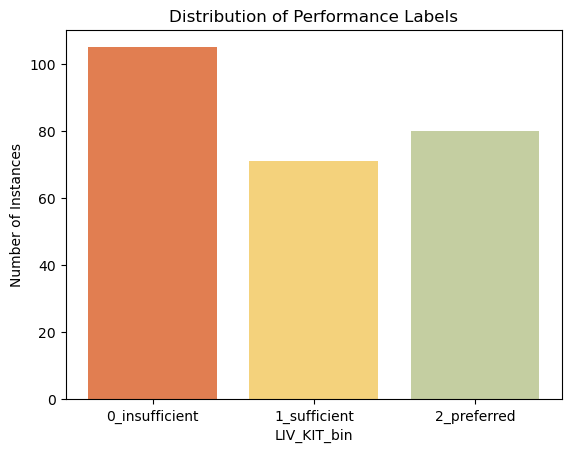

Number of unique 'unit_id' values: 256
apartment_id                             object
site_id                                   int64
building_id                               int64
plan_id                                   int64
floor_id                                  int64
                                         ...   
connectivity_kitchen_distance_p20       float64
connectivity_kitchen_distance_p80       float64
connectivity_kitchen_distance_stddev    float64
layout_biggest_rectangle_length         float64
layout_biggest_rectangle_width          float64
Length: 71, dtype: object
LIV_BATH_bin
0_insufficient    137
1_sufficient      119
Name: count, dtype: int64


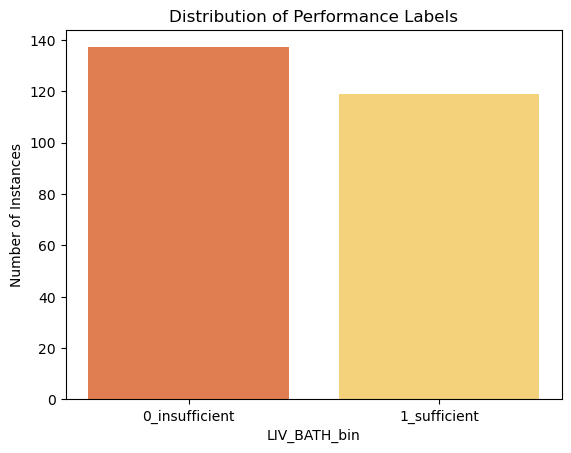

Number of unique 'unit_id' values: 256
Index(['apartment_id', 'site_id', 'building_id', 'plan_id', 'floor_id',
       'unit_id', 'area_id', 'unit_usage', 'entity_type', 'entity_subtype',
       'geometry', 'elevation', 'height', 'LIV_KIT', 'LIV_BED1', 'LIV_BED2',
       'LIV_BED3', 'LIV_BED4', 'LIV_BED5', 'LIV_BED6', '# OF BEDS',
       'LIV_BATH1', 'LIV_BATH2', 'LIV_BATH3', '# OF BATH', 'invalid_geometry',
       'LIV_KIT_bin', 'LIV_KIT_bin_mapped', 'layout_compactness',
       'layout_std_walllengths', 'layout_perimeter', 'layout_door_perimeter',
       'layout_open_perimeter', 'layout_number_of_doors',
       'connectivity_entrance_door_distance_max',
       'connectivity_entrance_door_distance_mean',
       'connectivity_entrance_door_distance_median',
       'connectivity_entrance_door_distance_min',
       'connectivity_entrance_door_distance_p20',
       'connectivity_entrance_door_distance_p80',
       'connectivity_entrance_door_distance_stddev',
       'connectivity_betweenne

In [22]:
import matplotlib.pyplot as plt

# Get the counts of each category
value_counts = training_df['LIV_KIT_bin'].value_counts()
print(training_df['LIV_KIT_bin'].value_counts())

# Define custom palette for histograms with hex values
hist_palette = {
    'insufficient': '#E17E51',  # Red for insufficient
    'sufficient': '#F4D27C',    # Orange for sufficient
    'preferred': '#C4CEA1',     # Green for preferred
}

# Define the colors for each category, using the custom palette
color_map = {
    '0_insufficient': hist_palette['insufficient'],
    '1_sufficient': hist_palette['sufficient'],
    '2_preferred': hist_palette['preferred']  
}

# Specify the desired order
order = ['0_insufficient', '1_sufficient', '2_preferred']

# Reorder value_counts based on the specified order and fill missing categories with 0
ordered_values = [value_counts.get(cat, 0) for cat in order]
colors = [color_map[cat] for cat in order]

# Create a bar plot with the specified order
plt.bar(order, ordered_values, color=colors)
plt.xlabel('LIV_KIT_bin')
plt.ylabel('Number of Instances')
plt.title('Distribution of Performance Labels')
plt.show()

# Check the number of unique 'unit_id' values in the training_set DataFrame
unique_unit_ids = training_df['unit_id'].nunique()
print("Number of unique 'unit_id' values:", unique_unit_ids)
print(training_df.dtypes)

# Add sightlines from living to toilet label with two possible classes: insufficient and sufficient
training_df['LIV_BATH_bin'] = training_df[['LIV_BATH1', 'LIV_BATH2']].max(axis=1).apply(lambda x: '0_insufficient' if x == 0 else '1_sufficient').astype(str)

# Get the counts of each category
value_counts = training_df['LIV_BATH_bin'].value_counts()
print(training_df['LIV_BATH_bin'].value_counts())

# Specify the desired order
order = ['0_insufficient', '1_sufficient']

# Reorder value_counts based on the specified order and fill missing categories with 0
ordered_values = [value_counts.get(cat, 0) for cat in order]
colors = [color_map[cat] for cat in order]

# Create a bar plot with the specified order
plt.bar(order, ordered_values, color=colors)
plt.xlabel('LIV_BATH_bin')
plt.ylabel('Number of Instances')
plt.title('Distribution of Performance Labels')
plt.show()

# Check the number of unique 'unit_id' values in the training_set DataFrame
unique_unit_ids = training_df['unit_id'].nunique()
print("Number of unique 'unit_id' values:", unique_unit_ids)
print(training_df.columns)

# Bath Bin Mapping

# Define a mapping dictionary
bin_mapping = {'0_insufficient': 0, '1_sufficient': 1}

# Map the values and create a new column
training_df['LIV_BATH_bin_mapped'] = training_df['LIV_BATH_bin'].map(bin_mapping)

pd.set_option('display.max_columns', None)  # Display all columns
print(training_df.dtypes)


# Finally, we use seaborn library to create our plots to better see how the feature correlate with the target variable. 
You can adjust the features list to test any combination of 6 features at a time

    LIV_KIT     LIV_KIT_bin  LIV_KIT_bin_mapped
0  0.375000    1_sufficient                   1
1  0.125000  0_insufficient                   0
2  0.000000  0_insufficient                   0
3  1.000000     2_preferred                   2
4  0.833333     2_preferred                   2


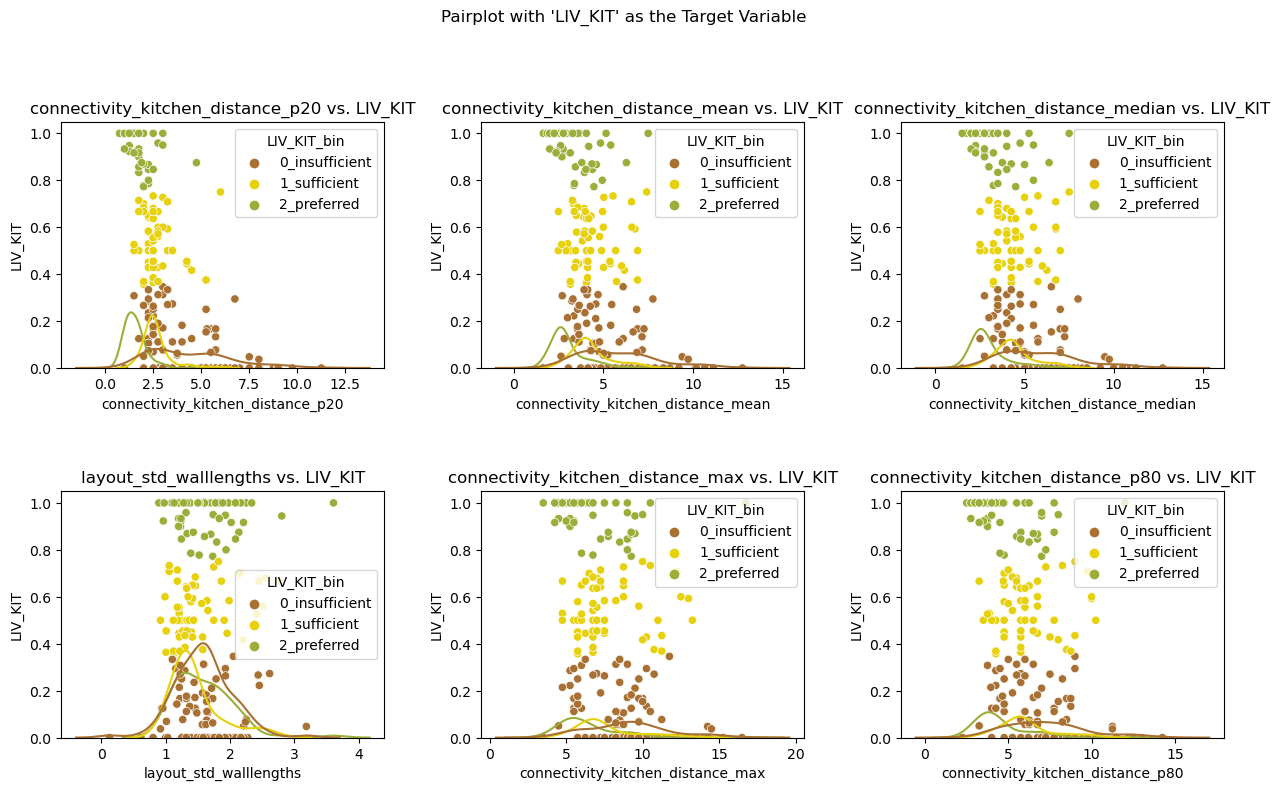

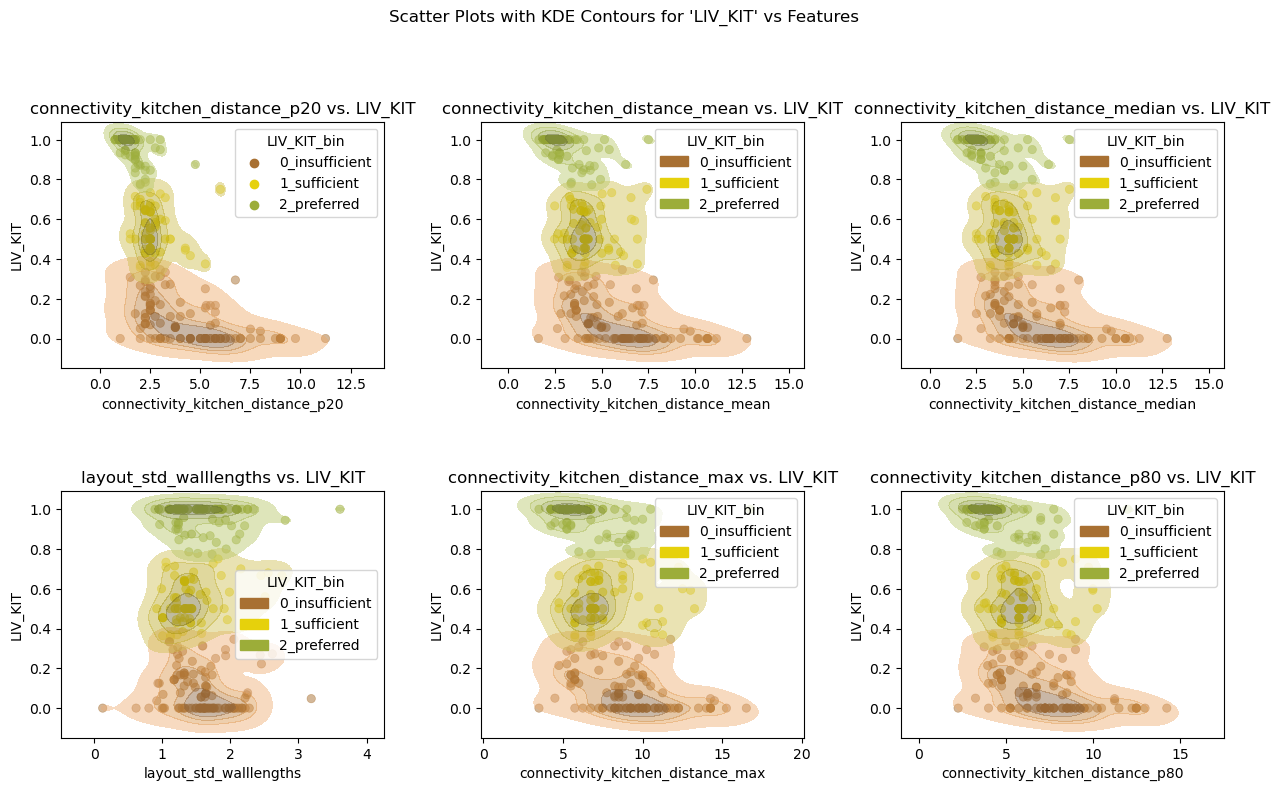

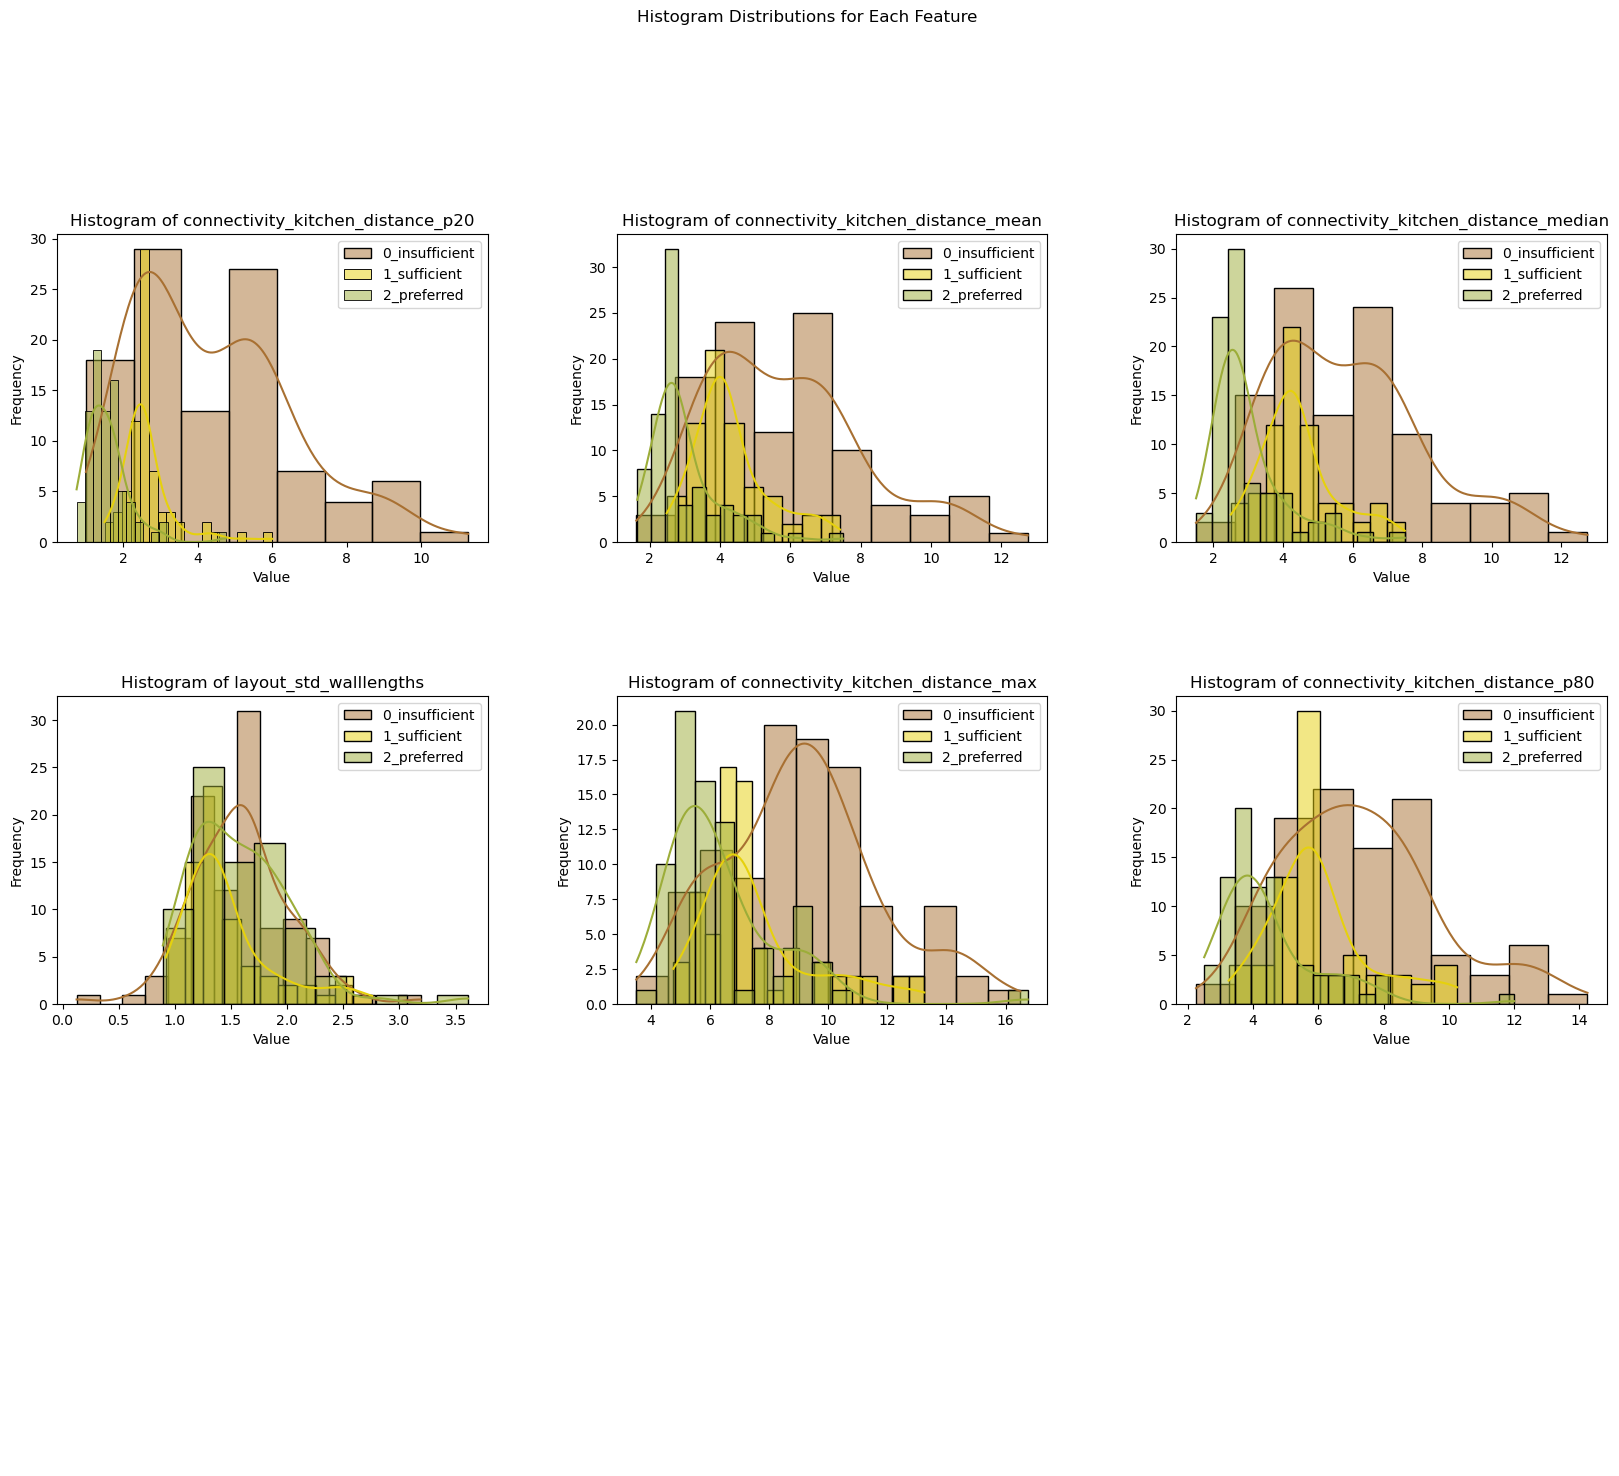

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Correct the bin_mapping to match the actual values in 'LIV_KIT_bin'
bin_mapping = {'0_insufficient': 0, '1_sufficient': 1, '2_preferred': 2}

# Create the new mapped column for 'LIV_KIT_bin'
training_df['LIV_KIT_bin_mapped'] = training_df['LIV_KIT_bin'].map(bin_mapping)

# Check the first few rows of the modified DataFrame again
print(training_df[['LIV_KIT', 'LIV_KIT_bin', 'LIV_KIT_bin_mapped']].head())

# Define custom color palette with hex values
hist_palette = {'0_insufficient': '#A87032', '1_sufficient': '#E6D10C', '2_preferred': '#9CAD39'}

# Select features
features = [
    'connectivity_kitchen_distance_p20',
    'connectivity_kitchen_distance_mean',
    'connectivity_kitchen_distance_median',
    'layout_std_walllengths',
    'connectivity_kitchen_distance_max',
    'connectivity_kitchen_distance_p80',
]

# 1. Pairplot with KDE on the Diagonal (3 columns, 2 rows)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 2 rows, 3 columns
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing as needed

for i, feature in enumerate(features):
    row_idx = i // 3
    col_idx = i % 3

    # Plot scatter plots
    sns.scatterplot(
        data=training_df,
        x=feature,
        y='LIV_KIT',
        hue='LIV_KIT_bin',
        palette=hist_palette,
        hue_order=['0_insufficient', '1_sufficient', '2_preferred'],
        ax=axes[row_idx, col_idx]
    )
    # Plot KDE
    sns.kdeplot(
        data=training_df, 
        x=feature, 
        hue='LIV_KIT_bin',
        palette=hist_palette,
        hue_order=['0_insufficient', '1_sufficient', '2_preferred'],
        legend=False,
        ax=axes[row_idx, col_idx]
    )
    axes[row_idx, col_idx].set_xlabel(feature)
    axes[row_idx, col_idx].set_ylabel('LIV_KIT')
    axes[row_idx, col_idx].set_title(f'{feature} vs. LIV_KIT')

plt.suptitle("Pairplot with 'LIV_KIT' as the Target Variable", y=1.02)
plt.show()



#--------#
# Set up the plot (3 columns, 2 rows)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 2 rows, 3 columns
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing as needed

for i, feature in enumerate(features):
    row_idx = i // 3
    col_idx = i % 3

    # Scatter plot
    sns.scatterplot(
        data=training_df,
        x=feature,
        y='LIV_KIT',
        hue='LIV_KIT_bin',
        palette=hist_palette,
        hue_order=['0_insufficient', '1_sufficient', '2_preferred'],
        ax=axes[row_idx, col_idx],
        alpha=0.5,  # Adjust transparency for scatter points
        edgecolor=None  # Remove edgecolor for scatter points
    )

    # KDE plot as contours
    sns.kdeplot(
        data=training_df,
        x=feature,
        y='LIV_KIT',
        hue='LIV_KIT_bin',
        palette=hist_palette,
        hue_order=['0_insufficient', '1_sufficient', '2_preferred'],
        ax=axes[row_idx, col_idx],
        fill=True,  # Fill the contours
        alpha=0.45,  # Adjust transparency for KDE
        levels=5,   # Number of contour levels
        common_norm=False,  # Normalize each KDE separately
    )

    axes[row_idx, col_idx].set_xlabel(feature)
    axes[row_idx, col_idx].set_ylabel('LIV_KIT')
    axes[row_idx, col_idx].set_title(f'{feature} vs. LIV_KIT')

# Adjust the legend
handles, labels = axes[0, 0].get_legend_handles_labels()
axes[0, 0].legend(handles=handles[:3], labels=labels[:3], title='LIV_KIT_bin', loc='upper right')

plt.suptitle("Scatter Plots with KDE Contours for 'LIV_KIT' vs Features", y=1.02)
plt.show()

#-----#
# Create histogram plots (3 rows, 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(20, 16))  # Adjust figsize as needed
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for i, feature in enumerate(features):
    row_idx = i // 3
    col_idx = i % 3
    ax = axes[row_idx, col_idx]

    # Plot histograms for each category in 'LIV_KIT_bin'
    for category, color in hist_palette.items():
        sns.histplot(
            data=training_df[training_df['LIV_KIT_bin'] == category],
            x=feature,
            color=color,
            alpha=0.5,  # Adjust transparency
            label=category,
            ax=ax,
            kde=True,  # Remove KDE (optional)
        )

    ax.set_title(f"Histogram of {feature}")
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend()

# Hide unused subplots
for i in range(len(features), 9):  # Adjust to the total number of subplots
    axes.flatten()[i].axis('off')

plt.suptitle("Histogram Distributions for Each Feature", y=1.02)
plt.show()

